# CartoonGAN 논문의 모델 구조
<img src="https://aruie.github.io/assets/post/191114-01.png" width=700>

- generator앞에 edge smoothing 작업을 앞에 놓아서
- 사진, 만화 이미지 둘다를 엣지를 완화시킴
- 그렇게 되면 엣지가 선명하지 않으므로 discriminator에서는 0을 출력함

- discriminator는 진짜 이미지(만화 이미지)로 보이면 1을 출력, 가짜 이미지(generator에서 생성한 이미지-카툰화된 사진, 엣지 smoothing 작업을 거친 만화 이미지)로 보이면 0을 출력


In [1]:
# Google Drive mount
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [79]:
image_path = '/content/drive/MyDrive/GoogleColab/CartoonGAN_Project/cartoon_data/벼랑위에 포뇨.mp4'
import os
import matplotlib.pyplot as plt

# 이미지 파일명을 담은 리스트 생성
imageName_list = os.listdir(image_path)
print(imageName_list)
print(len(imageName_list))

['벼랑위에 포뇨.mp4_000967174.png', '벼랑위에 포뇨.mp4_000972179.png', '벼랑위에 포뇨.mp4_000977184.png', '벼랑위에 포뇨.mp4_000982189.png', '벼랑위에 포뇨.mp4_000987194.png', '벼랑위에 포뇨.mp4_000992199.png', '벼랑위에 포뇨.mp4_000997204.png', '벼랑위에 포뇨.mp4_001002209.png', '벼랑위에 포뇨.mp4_001007214.png', '벼랑위에 포뇨.mp4_001012219.png', '벼랑위에 포뇨.mp4_001017224.png', '벼랑위에 포뇨.mp4_001022229.png', '벼랑위에 포뇨.mp4_001027234.png', '벼랑위에 포뇨.mp4_001032239.png', '벼랑위에 포뇨.mp4_001037244.png', '벼랑위에 포뇨.mp4_001042249.png', '벼랑위에 포뇨.mp4_001047254.png', '벼랑위에 포뇨.mp4_001052259.png', '벼랑위에 포뇨.mp4_001057264.png', '벼랑위에 포뇨.mp4_001062269.png', '벼랑위에 포뇨.mp4_001067274.png', '벼랑위에 포뇨.mp4_001072279.png', '벼랑위에 포뇨.mp4_001077284.png', '벼랑위에 포뇨.mp4_001082289.png', '벼랑위에 포뇨.mp4_001087294.png', '벼랑위에 포뇨.mp4_001092299.png', '벼랑위에 포뇨.mp4_001097304.png', '벼랑위에 포뇨.mp4_0011023

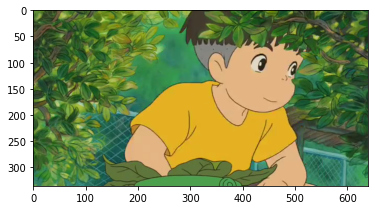

(640, 336)


In [80]:
from keras.preprocessing import image

# index=0인 이미지 보기
img1 = image.load_img(os.path.join(image_path, imageName_list[0]))
plt.imshow(img1)
plt.show()

print(img1.size)

# (300, 300)으로 리사이징

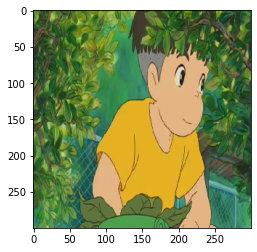

(300, 300)


In [82]:
# (300, 300) 사이즈로 resizing한 후 이미지 확인
img1_resize = image.load_img(os.path.join(image_path, imageName_list[0]), target_size=(300, 300))
plt.imshow(img1_resize)
plt.show()

print(img1_resize.size)

In [84]:
# 리사이징된 모든 이미지를 리스트 안에 담기
image_list = []
for i in range(len(imageName_list)):
  img = image.load_img(os.path.join(image_path, imageName_list[i]), target_size=(300, 300))  
  # 사이즈 (300, 300)으로 변환
  image_list.append(img)
print(imageName_list)  # 이미지 파일명 리스트
print(image_list)  # 이미지 리스트

['벼랑위에 포뇨.mp4_000967174.png', '벼랑위에 포뇨.mp4_000972179.png', '벼랑위에 포뇨.mp4_000977184.png', '벼랑위에 포뇨.mp4_000982189.png', '벼랑위에 포뇨.mp4_000987194.png', '벼랑위에 포뇨.mp4_000992199.png', '벼랑위에 포뇨.mp4_000997204.png', '벼랑위에 포뇨.mp4_001002209.png', '벼랑위에 포뇨.mp4_001007214.png', '벼랑위에 포뇨.mp4_001012219.png', '벼랑위에 포뇨.mp4_001017224.png', '벼랑위에 포뇨.mp4_001022229.png', '벼랑위에 포뇨.mp4_001027234.png', '벼랑위에 포뇨.mp4_001032239.png', '벼랑위에 포뇨.mp4_001037244.png', '벼랑위에 포뇨.mp4_001042249.png', '벼랑위에 포뇨.mp4_001047254.png', '벼랑위에 포뇨.mp4_001052259.png', '벼랑위에 포뇨.mp4_001057264.png', '벼랑위에 포뇨.mp4_001062269.png', '벼랑위에 포뇨.mp4_001067274.png', '벼랑위에 포뇨.mp4_001072279.png', '벼랑위에 포뇨.mp4_001077284.png', '벼랑위에 포뇨.mp4_001082289.png', '벼랑위에 포뇨.mp4_001087294.png', '벼랑위에 포뇨.mp4_001092299.png', '벼랑위에 포뇨.mp4_001097304.png', '벼랑위에 포뇨.mp4_0011023

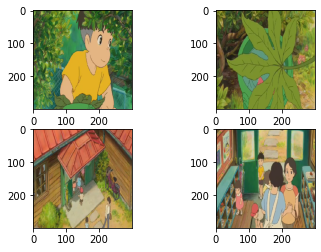

In [87]:
plt.subplot(2, 2, 1)  # 2행 2열의 1번째 위치에 그리기
plt.imshow(image_list[0])
plt.subplot(2, 2, 2)  # 2행 2열의 2번째 위치에 그리기
plt.imshow(image_list[1])
plt.subplot(2, 2, 3)
plt.imshow(image_list[2])
plt.subplot(2, 2, 4)
plt.imshow(image_list[3])
plt.show()

# 엣지 X 만화 이미지 만드는 작업

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# index=0인 이미지로 테스트
"""
단계 1. canny edge detector로 엣지 검출
-> img_canny = cv2.Canny(
              입력이미지,
              최소 threshold값,
              최대 threshold값, 
              edges=None          (edges에 Canny 결과를 저장할 변수, python은 Canny 함수 return 으로 받을 수 있기 때문에 필요 없음),
              apertureSize=None   (이미지 gradient를 구할 때 사용하는 sobel kernel 크기, default값:3),
              L2gradient=None     (gradient 크기 계산할 때 사용하는 식 None: sqrt{(dl/dx)^2 + (dl/dy)^2}, False:|dl/dx| + |dl/dy| 이렇게 근사값 사용, default값은 False)
              )
단계 2. 엣지 삭제
단계 3. gaussian filter 적용
"""
img = cv2.imread(image_path + "/" + imageName_list[0])
edges = cv2.Canny(img, 100, 200)

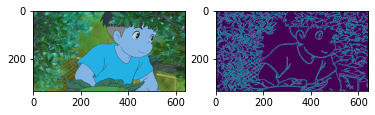

In [92]:
# 원본 그림, 검출된 엣지 그림
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(edges)
plt.show()

[[0.17820326]
 [0.21052227]
 [0.22254894]
 [0.21052227]
 [0.17820326]]
[[0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.03965895 0.04685151 0.04952803 0.04685151 0.03965895]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]]


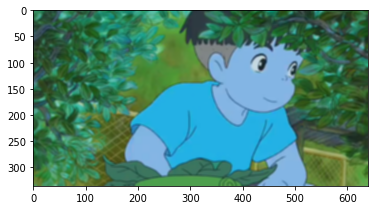

In [58]:
kernel1d = cv2.getGaussianKernel(5, 3)  # kernel size=5, sigma=3인 가우시안 1D 커널 생성
# print(kernel1d)
kernel2d = np.outer(kernel1d, kernel1d.transpose())  # 가우시안 1D 커널을 내적해서 가우시안 2D 커널 생성
# print(kernel2d)

img = cv2.imread(image_path + "/" + imageName_list[0])  # image load
img_array = np.asarray(img)  # image to np.array

low_img_array = cv2.filter2D(img_array, -1, kernel2d)  # convolve
from PIL import Image
low_img = Image.fromarray(low_img_array)  # np.array to image

plt.imshow(low_img)
plt.show()

In [72]:
dilation = cv2.dilate(edges, kernel2d)
pad_img = np.pad(img, ((2, 2), (2, 2), (0, 0)), mode="reflect")

In [88]:

# save_dir = "/content/drive/MyDrive/GoogleColab/CartoonGAN_Project/Animation_data_filter/벼랑위에 포뇨.mp4"

# gauss_img = np.copy(img)
# idx = np.where(dilation != 0)
# for file_name in imageName_list:
#   for i in range(np.sum(dilation != 0)):
#     gauss_img[idx[0][i], idx[1][i], 0] = np.sum(np.multiply(
#         pad_img[idx[0][i]:idx[0][i] + 5, idx[1][i]:idx[1][i] + 5, 0],
#         kernel2d))
#     gauss_img[idx[0][i], idx[1][i], 1] = np.sum(np.multiply(
#         pad_img[idx[0][i]:idx[0][i] + 5, idx[1][i]:idx[1][i] + 5, 1],
#         kernel2d))
#     gauss_img[idx[0][i], idx[1][i], 2] = np.sum(np.multiply(
#         pad_img[idx[0][i]:idx[0][i] + 5, idx[1][i]:idx[1][i] + 5, 2],
#         kernel2d))

#     cv2.imwrite(os.path.join(save_dir, file_name), gauss_img)